<a href="https://colab.research.google.com/github/bestekucuk/FFN-Model/blob/main/deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd


**Large Dataset**

In [ ]:
path3='/content/gdrive/MyDrive/Database/News Article Categorization(IAB) Dataset/TIL Dataset(Cleaned).csv'


In [ ]:
data_xl=pd.read_csv(path3)

In [ ]:
data_xl.head(100)

In [ ]:
data_xl.info()

In [ ]:
data_xl.target.unique()

In [ ]:
data_xl.target.unique().shape

In [ ]:
data_xl.isnull().sum()

In [ ]:
data_xl.target.value_counts()

In [ ]:
max_samples_per_category = 35000


In [ ]:
academic_interests_samples = data_xl[data_xl['target'] == 'academic interests'].sample(n=max_samples_per_category, random_state=42)
books_and_literature_samples = data_xl[data_xl['target'] == 'books and literature'].sample(n=max_samples_per_category, random_state=42)

In [ ]:
academic_interests_samples.count()

text          35000
target        35000
Word Count    35000
dtype: int64

In [ ]:
# Diğer kategorilerden tüm örnekleri alın
other_categories = data_xl[~data_xl['target'].isin(['academic interests', 'books and literature'])]

In [ ]:
other_categories.count()

text          748231
target        748231
Word Count    748231
dtype: int64

In [ ]:
# Seçilen örnekleri birleştirme
balanced_df = pd.concat([academic_interests_samples, books_and_literature_samples, other_categories])


In [ ]:
balanced_df.count()

text          818231
target        818231
Word Count    818231
dtype: int64

In [ ]:
# Veri setini karıştırma (shuffle) ve indeksi sıfırlama
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)


In [ ]:
balanced_df

,text,target,Word Count
0,Isolated thyrotropin deficiency secondary to p...,"pharmaceuticals, conditions, and symptoms",162
1,PUNE: In light of the Eknath Shinde government...,health,253
2,Ex-contestant of Bigg Boss Tamil season 2 Vais...,style and fashion,150
3,"New Delhi, Nov 26 () The upcoming IPO of Futur...",automotives,334
4,"To prevent nuclear annihilation, Special Force...",books and literature,165
...,...,...,...
818226,THIRUVANANTHAPURAM/KOCHI/MALAPPURAM/ALAPPUZHA:...,shopping,333
818227,"Nagpur: Now, a litigant or a lawyer can file a...",technology and computing,481
818228,"Carer ‘I love being able to help others, no ma...",careers,256
818229,"Chennai: As India enters the 5G race, there ar...",automotives,500


In [ ]:
data_xl=balanced_df

In [ ]:
data_xl.describe(include='all')

,text,target,Word Count
count,818231,818231,818231.000000
unique,817496,26,NaN
top,working at icf working at icf means applying a...,healthy living,NaN
freq,21,38681,NaN
mean,NaN,NaN,307.746584
std,NaN,NaN,138.368112
min,NaN,NaN,100.000000
25%,NaN,NaN,180.000000
50%,NaN,NaN,294.000000
75%,NaN,NaN,450.000000


In [ ]:
data_xl.text.duplicated(keep='first').value_counts()

False    817496
True        735
Name: text, dtype: int64

In [ ]:
data_xl.drop_duplicates(subset='text', keep='first',inplace=True,ignore_index=True)

In [ ]:
data_xl.describe()

,Word Count
count,817496.000000
mean,307.617605
std,138.321388
min,100.000000
25%,180.000000
50%,294.000000
75%,450.000000
max,500.000000


In [ ]:
data_xl

,text,target,Word Count
0,Isolated thyrotropin deficiency secondary to p...,"pharmaceuticals, conditions, and symptoms",162
1,PUNE: In light of the Eknath Shinde government...,health,253
2,Ex-contestant of Bigg Boss Tamil season 2 Vais...,style and fashion,150
3,"New Delhi, Nov 26 () The upcoming IPO of Futur...",automotives,334
4,"To prevent nuclear annihilation, Special Force...",books and literature,165
...,...,...,...
817491,THIRUVANANTHAPURAM/KOCHI/MALAPPURAM/ALAPPUZHA:...,shopping,333
817492,"Nagpur: Now, a litigant or a lawyer can file a...",technology and computing,481
817493,"Carer ‘I love being able to help others, no ma...",careers,256
817494,"Chennai: As India enters the 5G race, there ar...",automotives,500


<Axes: >

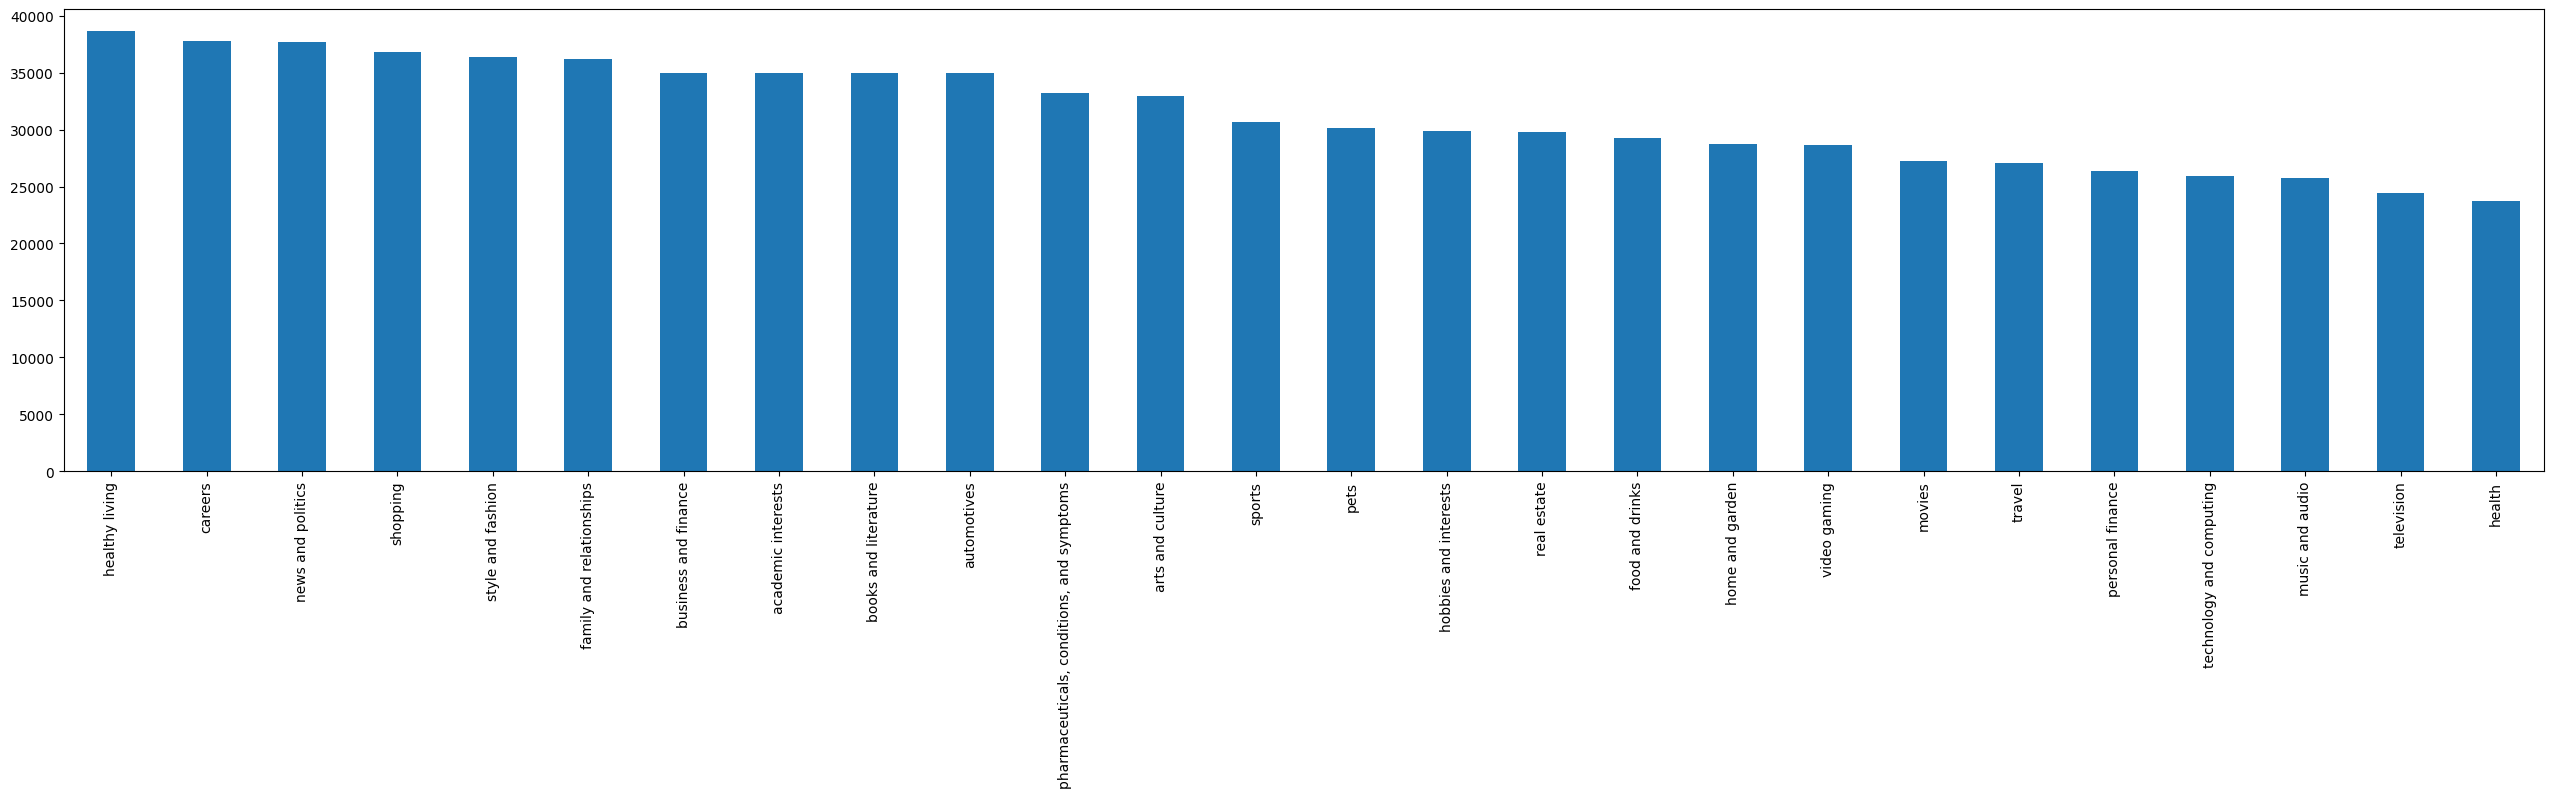

In [ ]:
data_xl.target.value_counts().plot.bar(x='topics',y='Number of Reviews',figsize=(32,6))

In [ ]:
data_xl['Word Count'].describe()

count    817496.000000
mean        307.617605
std         138.321388
min         100.000000
25%         180.000000
50%         294.000000
75%         450.000000
max         500.000000
Name: Word Count, dtype: float64

The longest review has 500 words.


%75 of the reviews have less than 400 words.


We could(wiil) use these statistics.

*   to filter out some of the reviews,
*   to determine the maximum review size



---



Review Length in terms Number of Words per Topic

In [ ]:
data_xl.groupby(['target'])['Word Count'].describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
academic interests,34995.0,306.114102,119.463774,100.0,208.0,292.0,400.00,500.0
arts and culture,32935.0,343.952816,132.670885,100.0,232.0,348.0,500.00,500.0
automotives,34972.0,349.170708,149.614429,100.0,205.0,387.5,500.00,500.0
books and literature,34991.0,205.593010,107.407708,100.0,133.0,166.0,233.00,500.0
business and finance,35023.0,340.881478,138.986580,100.0,222.0,355.0,500.00,500.0
careers,37768.0,263.976117,117.163942,100.0,168.0,239.0,335.00,500.0
family and relationships,36172.0,313.012164,143.890889,100.0,175.0,306.0,483.25,500.0
food and drinks,29280.0,346.507719,139.296586,100.0,225.0,362.0,500.00,500.0
health,23707.0,295.372590,129.035758,100.0,182.0,279.0,401.00,500.0


alt sınır 100


üst sınır 200 olabilir

Bu elemeler daha önce yapılmıs olabilir.O yüzden böyle kalsın

In [ ]:
max_review_size=500
data_xl[data_xl['Word Count']>max_review_size].count()

text          0
target        0
Word Count    0
dtype: int64

In [ ]:
data_xl.shape

(817496, 3)

In [ ]:
#reduced_data=data_xl[data_xl['Word Count']<max_review_size]
reduced_data=data_xl

In [ ]:
reduced_data.count()

text          817496
target        817496
Word Count    817496
dtype: int64

**Analyze the Vocabulary**

In [ ]:
reduced_data.count()

text          817496
target        817496
Word Count    817496
dtype: int64

In [ ]:
vocab=set()
corpus= [x.split() for x in reduced_data['text'].tolist()]
for sentence in corpus:
   for word in sentence:
       vocab.add(word.lower())
print("number of distinct words in raw data:", len(vocab))

In [ ]:
data=reduced_data.sample(frac=1)

In [ ]:
reduced_data


In [ ]:

# Veri setinde bir filtreleme yapalım (örneğin, index'i 1 olan satırı silelim)
reduced_data = reduced_data.drop(index=1)


In [ ]:
reduced_data

,text,target,Word Count
0,Isolated thyrotropin deficiency secondary to p...,"pharmaceuticals, conditions, and symptoms",162
2,Ex-contestant of Bigg Boss Tamil season 2 Vais...,style and fashion,150
3,"New Delhi, Nov 26 () The upcoming IPO of Futur...",automotives,334
4,"To prevent nuclear annihilation, Special Force...",books and literature,165
5,NEW DELHI: The golden period of Indian sports ...,sports,385
...,...,...,...
817491,THIRUVANANTHAPURAM/KOCHI/MALAPPURAM/ALAPPUZHA:...,shopping,333
817492,"Nagpur: Now, a litigant or a lawyer can file a...",technology and computing,481
817493,"Carer ‘I love being able to help others, no ma...",careers,256
817494,"Chennai: As India enters the 5G race, there ar...",automotives,500


In [ ]:
# reset_index kullanarak indeksi düzeltebiliriz
reduced_data = reduced_data.reset_index(drop=True)



In [ ]:

reduced_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817495 entries, 0 to 817494
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   text        817495 non-null  object
 1   target      817495 non-null  object
 2   Word Count  817495 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 18.7+ MB


In [ ]:
reduced_data.groupby(['target']).describe()

Word Count                          \
                                               count        mean         std   
target                                                                         
academic interests                           34995.0  306.114102  119.463774   
arts and culture                             32935.0  343.952816  132.670885   
automotives                                  34972.0  349.170708  149.614429   
books and literature                         34991.0  205.593010  107.407708   
business and finance                         35023.0  340.881478  138.986580   
careers                                      37768.0  263.976117  117.163942   
family and relationships                     36172.0  313.012164  143.890889   
food and drinks                              29280.0  346.507719  139.296586   
health                                       23706.0  295.374378  129.038186   
healthy living                               38668.0  329.534525  154.498688   
hobbies and interests                        29921.0  349.927810  137.551900   
home and garden                              28753.0  343.044169  137.243445   
movies                                       27222.0  236.778929  122.741260   
music and audio                              25779.0  265.257108  130.962904   
news and politics                            37733.0  292.546604  156.156076   
personal finance                             26407.0  334.560344  128.362122   
pets                                         30162.0  327.611664  126.828814   
pharmaceuticals, conditions, and symptoms    33245.0  215.565468   67.393299   
real estate                                  29795.0  345.409599  123.625789   
shopping                                     36830.0  333.490931  139.387582   
sports                                       30669.0  306.211321  131.256801   
style and fashion                            36410.0  298.999423  142.039889   
technology and computing                     25889.0  334.254162  131.691780   
television                                   24399.0  267.407148  117.060046   
travel                                       27098.0  298.238578  135.404782   
video gaming                                 28673.0  357.795138  123.580829   

                                                                               
                                             min    25%    50%     75%    max  
target                                                                         
academic interests                         100.0  208.0  292.0  400.00  500.0  
arts and culture                           100.0  232.0  348.0  500.00  500.0  
automotives                                100.0  205.0  387.5  500.00  500.0  
books and literature                       100.0  133.0  166.0  233.00  500.0  
business and finance                       100.0  222.0  355.0  500.00  500.0  
careers                                    100.0  168.0  239.0  335.00  500.0  
family and relationships                   100.0  175.0  306.0  483.25  500.0  
food and drinks                            100.0  225.0  362.0  500.00  500.0  
health                                     100.0  182.0  279.0  401.00  500.0  
healthy living                             100.0  157.0  347.0  500.00  500.0  
hobbies and interests                      100.0  224.0  361.0  500.00  500.0  
home and garden                            100.0  219.0  352.0  500.00  500.0  
movies                                     100.0  134.0  196.0  308.00  500.0  
music and audio                            100.0  149.0  238.0  359.00  500.0  
news and politics                          100.0  124.0  281.0  474.00  500.0  
personal finance                           100.0  225.0  332.0  471.00  500.0  
pets                                       100.0  221.0  320.0  455.00  500.0  
pharmaceuticals, conditions, and symptoms  100.0  163.0  211.0  260.00  500.0  
real estate                              

**Create int from text**

In [ ]:
reduced_data.dtypes


text          object
target        object
Word Count     int64
dtype: object

In [ ]:
reduced_data['target'] = reduced_data['target'].astype(reduced_data['target'].dtype)


In [ ]:
reduced_data.dtypes

text          object
target        object
Word Count     int64
dtype: object

In [ ]:
reduced_data['target']

0         pharmaceuticals, conditions, and symptoms
1                                 style and fashion
2                                       automotives
3                              books and literature
4                                            sports
                            ...                    
817490                                     shopping
817491                     technology and computing
817492                                      careers
817493                                  automotives
817494                                      careers
Name: target, Length: 817495, dtype: object

target category tipini donusturulur.

In [ ]:
reduced_data['target']=reduced_data['target'].astype('category')

In [ ]:
reduced_data.dtypes

text            object
target        category
Word Count       int64
dtype: object

In [ ]:
reduced_data['target_id']=reduced_data['target'].cat.codes

In [ ]:
reduced_data.head()

,text,target,Word Count,target_id
0,Isolated thyrotropin deficiency secondary to p...,"pharmaceuticals, conditions, and symptoms",162,17
1,Ex-contestant of Bigg Boss Tamil season 2 Vais...,style and fashion,150,21
2,"New Delhi, Nov 26 () The upcoming IPO of Futur...",automotives,334,2
3,"To prevent nuclear annihilation, Special Force...",books and literature,165,3
4,NEW DELHI: The golden period of Indian sports ...,sports,385,20


Kategorimiz sayısal değere donusturduk.

In [ ]:
reduced_data.dtypes

text            object
target        category
Word Count       int64
target_id         int8
dtype: object

ID ler için dictionary olusturalım.

ID to TEXT

In [ ]:
id_to_target=pd.Series(reduced_data.target.values,index=reduced_data.target_id).to_dict()
id_to_target

{17: 'pharmaceuticals, conditions, and symptoms',
 21: 'style and fashion',
 2: 'automotives',
 3: 'books and literature',
 20: 'sports',
 22: 'technology and computing',
 25: 'video gaming',
 10: 'hobbies and interests',
 12: 'movies',
 8: 'health',
 15: 'personal finance',
 16: 'pets',
 9: 'healthy living',
 19: 'shopping',
 1: 'arts and culture',
 11: 'home and garden',
 14: 'news and politics',
 24: 'travel',
 0: 'academic interests',
 6: 'family and relationships',
 5: 'careers',
 23: 'television',
 13: 'music and audio',
 4: 'business and finance',
 7: 'food and drinks',
 18: 'real estate'}

Text categoryler için dictionary oluşturalım.

TEXT to ID

In [ ]:
target_to_id={v:k for k,v in id_to_target.items()}

In [ ]:
target_to_id

{'pharmaceuticals, conditions, and symptoms': 17,
 'style and fashion': 21,
 'automotives': 2,
 'books and literature': 3,
 'sports': 20,
 'technology and computing': 22,
 'video gaming': 25,
 'hobbies and interests': 10,
 'movies': 12,
 'health': 8,
 'personal finance': 15,
 'pets': 16,
 'healthy living': 9,
 'shopping': 19,
 'arts and culture': 1,
 'home and garden': 11,
 'news and politics': 14,
 'travel': 24,
 'academic interests': 0,
 'family and relationships': 6,
 'careers': 5,
 'television': 23,
 'music and audio': 13,
 'business and finance': 4,
 'food and drinks': 7,
 'real estate': 18}

Check the number of categories

In [ ]:
number_of_target=len(target_to_id)
print("number of targets:",number_of_target)

number of targets: 26


In [ ]:
reduced_data.info()

#SAVE TARGET TO ID

In [ ]:
%ls

In [ ]:
%cd /content/gdrive/MyDrive/Colab Notebooks/model

In [ ]:
%ls

In [ ]:
import pickle
with open('id_to_target.pkl', 'wb') as fp:
    pickle.dump(id_to_target, fp)

**TRAİN,VALİDATİON,TEST**

data leakage:Veri sızıntısı, modelin gelecekteki öngörülerini gerçekleştirmek için kullanılamayacak bir şekilde eğitilmiş olduğu durumları ifade eder.

In [ ]:
#split train & test datasets

#save features and targets from the 'data'

from sklearn.model_selection import train_test_split

features, targets = reduced_data['text'], reduced_data['target_id']
all_train_features, test_features, all_train_targets, test_targets=train_test_split(
    features,targets,
    train_size=0.8,
    test_size=0.2,
    random_state=42,
    shuffle=True, #sıralı veri setini engeller
    stratify=targets )

In [ ]:
#Reduce the size of the Train Dataset(sadece train veri azaltılır,test verisi aynı kalır.)

In [ ]:
print("All train data set size:",len(all_train_features))
print("All test data set size:",len(test_features))

All train data set size: 653996
All test data set size: 163499


In [ ]:
reduce_ratio=0.05 #yuzde 5 i kullanılır

reduced_train_features,_,reduced_train_targets,_=train_test_split(
    all_train_features,all_train_targets,
    train_size=reduce_ratio,
    random_state=42,
    shuffle=True,
    stratify=all_train_targets
)


In [ ]:
print("Reduced train data set size:",len(reduced_train_features))
print("test data set size:",len(test_features))

Reduced train data set size: 32699
test data set size: 163499


Split Train & Validation Datasets

In [ ]:
train_features,val_features,train_targets,val_targets=train_test_split(
    reduced_train_features,reduced_train_targets,
    train_size=0.9,
    random_state=42,
    shuffle=True,
    stratify=reduced_train_targets
)
#validation için veriyi azaltmiş oldugumuz datadan alıyoruz.aynı testdeki mantık gibi.train ve valid olarak bolunuyor.

In [ ]:
print("train data set size:" ,len(train_features))
print("validation data set size:" ,len(val_features))
print("test data set size:" ,len(test_features))
#cok testde az boyutlu train dogrulugu yüksek cıkarsa modelimiz gucludur.

train data set size: 29429
validation data set size: 3270
test data set size: 163499


# Preprocessing text with TF Data Pipeline and Keras Text Vectorization Layer

**Derin öğrenme modeline verilecek verinin son hale getirilmesi**

Tenserflow Data Pipeline to preprocess the data with *Keras Vektorization* layer.


We use "tf.data" API from tenserflow

Buil the train tenserflow datasets

In [ ]:
train_features.count

<bound method Series.count of 549839    Curtains are down on the 17-year-old relations...
381324    JAIPUR: Will Rajasthan’s exile from Indian and...
621656    Language Defamatory Inciting hatred against a ...
578899    and books included a critical appreciation of ...
269848    his next project: adapting British author Juli...
                                ...                        
652505    MUMBAI: The state government on Tuesday allowe...
615076    Feb 22 (Reuters) - Wall Street securities anal...
393834    JAIPUR: One of Rajasthan’s top gold robbers, i...
532017    "She's still my child," he said. She's still p...
711197    Madurai: Madurai Kamaraj University (MKU) is s...
Name: text, Length: 29429, dtype: object>

In [ ]:
train_targets.values[:2]

array([6, 4], dtype=int8)

In [ ]:
#input dataset
train_text_ds_raw=tf.data.Dataset.from_tensor_slices(
    tf.cast(train_features.values,tf.string)
)

In [ ]:
train_text_ds_raw

<_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>

We will create 2 TF Datasets from the raw Train Dataframe for further processing:

1-for input (text/reviews)


2-for target (categories/topics)



  tf de calısabılmek için dataset clumnlarını tf veri setine dönüştürüyoruz.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras
import re
import string
import random
from sklearn.model_selection import train_test_split
import tensorflow_datasets as tfds
import json

In [ ]:
from tensorflow.keras import layers


In [ ]:
#title Record Each Cell's Execution Time
!pip install ipython-autotime
%load_ext autotime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.4 MB/s eta 0:00:00
time: 391 µs (started: 2024-01-05 07:47:21 +00:00)


In [ ]:
# this is the target (categories/topics) dataset
train_cat_ds_raw = tf.data.Dataset.from_tensor_slices(
            tf.cast(train_targets.values, tf.int64)
)

time: 8.51 ms (started: 2024-01-05 07:47:21 +00:00)


In [ ]:
reduced_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817495 entries, 0 to 817494
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   text        817495 non-null  object  
 1   target      817495 non-null  category
 2   Word Count  817495 non-null  int64   
 3   target_id   817495 non-null  int8    
dtypes: category(1), int64(1), int8(1), object(1)
memory usage: 14.0+ MB
time: 334 ms (started: 2024-01-05 07:47:21 +00:00)


In [ ]:
train_targets

549839     6
381324     4
621656    19
578899     3
269848     1
          ..
652505    19
615076    22
393834    15
532017     9
711197    22
Name: target_id, Length: 29429, dtype: int8

time: 6.3 ms (started: 2024-01-05 07:47:21 +00:00)


Decide the dictionary size and the review size

> For preprocessing the text, we need to decide the **dictionary (vocab) size** and the **maximum review (text) size**.

For the dictionary size (`vocab_size`), we observed that, in the raw dataset, we have more than **2 million words**.

That is too much!

Therefore, I opted out using **100K words** as the `vocab_size`.

Of course, you can try different **`max_len`** and **`vocab_size`** sizes depending on your dataset, hardware, and the Deep Learning model. Actually, you need to **tune** these kinds of **hyper-parameters** to achieve better performance.

tuning:hiperparametre ayarlaması veya modelin mimarisini değiştirme gibi işlemleri içerebilir.

In [ ]:
vocab_size = 100000  # Only consider the top 100K words
max_len = max_review_size  # Max review size in words

time: 638 µs (started: 2024-01-05 07:47:24 +00:00)


In [ ]:
max_review_size

500

time: 12.1 ms (started: 2024-01-05 07:47:24 +00:00)


**Prepare the Keras Text Vectorization layer**

To preprocess the text, I will use Keras TextVectorization layer.


With Keras Preprocessing Layers, you can build and export models that are truly end-to-end: models that accept raw images or raw structured data as input; models that handle feature normalization or feature value indexing on their own.

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))

def remove_stop_words(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Örnek kullanım
text = "This is an example sentence with some stop words."
cleaned_text = remove_stop_words(text)
print(cleaned_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


example sentence stop words .
time: 1.46 s (started: 2024-01-05 07:47:27 +00:00)


In [ ]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

time: 15.6 ms (started: 2024-01-05 07:47:30 +00:00)


In [ ]:
# Custom Standardization

@tf.keras.utils.register_keras_serializable()
def custom_standardization(input_string):
    # Convert to lowercase
    no_uppercased = tf.strings.lower(input_string, encoding='utf-8')

    # Replace '*' characters with a space
    no_stars = tf.strings.regex_replace(no_uppercased, "\*", " ")

    # Remove the phrase "devamını oku"
    no_repeats = tf.strings.regex_replace(no_stars, "devamını oku", "")

    # Replace the HTML line-break tag "<br />" with a space
    no_html = tf.strings.regex_replace(no_repeats, "<br />", "")

    # Remove digits
    no_digits = tf.strings.regex_replace(no_html, "\w*\d\w*", "")

    # Replace punctuation characters with spaces
    no_punctuations = tf.strings.regex_replace(no_digits, f"([{string.punctuation}])", r" ")

    # Remove stop words
    no_stop_words = ' ' + no_punctuations + ' '
    for each in stop_words:
        no_stop_words = tf.strings.regex_replace(no_stop_words, ' ' + each + ' ', r" ")

    # Remove extra spaces
    no_extra_space = tf.strings.regex_replace(no_stop_words, " +", " ")

    # Replace Turkish characters with their corresponding Latin characters
    no_I = tf.strings.regex_replace(no_extra_space, "ı", "i")
    no_O = tf.strings.regex_replace(no_I, "ö", "o")
    no_C = tf.strings.regex_replace(no_O, "ç", "c")
    no_S = tf.strings.regex_replace(no_C, "ş", "s")
    no_G = tf.strings.regex_replace(no_S, "ğ", "g")
    no_U = tf.strings.regex_replace(no_G, "ü", "u")

    return no_U



time: 1.72 ms (started: 2024-01-05 07:47:45 +00:00)


In [ ]:
# Example Usage
input_text = "Merhaba, bu bir örnek* metindir. Devamını oku.<br />123!"
result = custom_standardization(tf.constant(input_text))
print(result.numpy().decode('utf-8'))

 merhaba bu bir ornek metindir 
time: 308 ms (started: 2024-01-05 07:47:49 +00:00)


In [ ]:
input_string = "Bu Issız Öğlenleyin de; too,under,until,up,ve, and of life whom şunu ***1 Pijamalı Hasta***, ve  Ancak İşte Yağız Şoföre Çabucak Güvendi...Devamını oku"
print("input:  ", input_string)
output_string= custom_standardization(input_string)
print("output: ", output_string.numpy().decode("utf-8"))

input:   Bu Issız Öğlenleyin de; too,under,until,up,ve, and of life whom şunu ***1 Pijamalı Hasta***, ve  Ancak İşte Yağız Şoföre Çabucak Güvendi...Devamını oku
output:   bu issiz oglenleyin de life sunu pijamali hasta ancak i̇ste yagiz sofore cabucak guvendi 
time: 41.9 ms (started: 2024-01-05 07:47:52 +00:00)


### **Build TextVectorization Layer**


ilk 100k kelime için bir sözlük oluşur.her kelime bir int estir.



token-->cümleleri kelimeleri parcalamak

In [ ]:
# Create a vectorization layer and adapt it to the text
from tensorflow.keras.layers import TextVectorization


vectorize_layer = TextVectorization(
    standardize=custom_standardization,
    max_tokens=vocab_size - 1,
    output_mode="int", #tf-idf / int / binary / count ---tüm metniincele vocab_size kadar kelimeyi sözlüğe al.sözlükteki wordleri int cevir.
    output_sequence_length=max_len,
)

time: 94.1 ms (started: 2024-01-05 07:47:53 +00:00)


### Adopt the Text Vectorization layer


`TextVectorization` holds a **mapping** between **string** tokens and integer **indices**.

To prevent and data leak, we **DO NOT** adopt `TextVectorization` preprocessing layer to the **whole** (***train & test***) data.

In [ ]:
vectorize_layer.adapt(train_text_ds_raw)   #--->metinde en sık gecen 100k kelimeyi int cevirir ve sozluk olusturur.
vocab = vectorize_layer.get_vocabulary()   #elde edilen sozluk geri doner
# To get words back from token indices

time: 1min 27s (started: 2024-01-05 07:47:56 +00:00)


### Check the dictionary (vocab) and preprocessing

In [ ]:
print("vocab has the ", len(vocab)," entries")
print("vocab has the following first 10 entries")
for word in range(10):
  print(word, " represents the word: ", vocab[word])
print("2 sample text preprocessing:")
for X in train_text_ds_raw.take(2):
  print(" Given raw data: " )
  print(X.numpy().decode("utf-8") )
  tokenized = vectorize_layer(tf.expand_dims(X, -1))
  print(" Tokenized and Transformed to a vector of integers: " )
  print (tokenized)
  print(" Text after Tokenized and Transformed: ")
  transformed = ""
  for each in tf.squeeze(tokenized):
    transformed= transformed+ " "+ vocab[each]
  print(transformed)

vocab has the  99999  entries
vocab has the following first 10 entries
0  represents the word:  
1  represents the word:  [UNK]
2  represents the word:  said
3  represents the word:  also
4  represents the word:  one
5  represents the word:  new
6  represents the word:  ”
7  represents the word:  year
8  represents the word:  time
9  represents the word:  india
2 sample text preprocessing:
 Given raw data: 
Curtains are down on the 17-year-old relationship between Diageo, the world's largest drinks company, and its Indian partner, the Tanil Kilachand family. Diageo snapped the distribution alliance with Sun Tan Trading Co recently and now handles distribution of Johnnie Walker and Smirnoff brands on its own. In 1994, the Kilachands brought Diageo into the country and held a 40% stake in its local arm, then known as International Distillers India (IDI). Over the years, the family had exited IDI but till recently was handling the distribution of Diageo brands in India. However, after fin

In [ ]:
vocab[:15]

['',
 '[UNK]',
 'said',
 'also',
 'one',
 'new',
 '”',
 'year',
 'time',
 'india',
 'people',
 'would',
 'like',
 'two',
 'first']

time: 8.39 ms (started: 2024-01-05 07:49:23 +00:00)


## Save & Load the adopted TextVectorization layer

Her seferinde adopt etmemek için kaydediyoruz.

In [ ]:
%cd drive




[Errno 107] Transport endpoint is not connected: 'drive'
/content
time: 5.82 ms (started: 2024-01-05 07:53:02 +00:00)


In [ ]:
%cd MyDrive


[Errno 2] No such file or directory: 'MyDrive'
/content
time: 2.71 ms (started: 2024-01-05 07:53:04 +00:00)


In [ ]:
%cd Colab Notebooks

[Errno 2] No such file or directory: 'Colab Notebooks'
/content
time: 2.61 ms (started: 2024-01-05 07:53:06 +00:00)


In [ ]:
%ls

ls: cannot access 'drive': Transport endpoint is not connected
drive/  gdrive/  sample_data/  vectorize_layer_model/
time: 109 ms (started: 2024-01-05 07:53:07 +00:00)


In [ ]:
%cd model



[Errno 2] No such file or directory: 'model'
/content
time: 3.6 ms (started: 2024-01-05 07:53:13 +00:00)


In [ ]:
#Gecici model olusturma
vectorize_layer_model=tf.keras.models.Sequential()


time: 6.94 ms (started: 2024-01-05 07:49:58 +00:00)


In [ ]:
vectorize_layer_model.add(tf.keras.Input(shape=(1,), dtype=tf.string))
vectorize_layer_model.add(vectorize_layer)
vectorize_layer_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, 500)               0         
 ctorization)                                                    
                                                                 
Total params: 0 (0.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
time: 172 ms (started: 2024-01-05 07:50:00 +00:00)


In [ ]:
filepath="vectorize_layer_model"
vectorize_layer_model.save(filepath,save_format="tf")

time: 1.31 s (started: 2024-01-05 07:53:18 +00:00)


In [ ]:
%ls

ls: cannot access 'drive': Transport endpoint is not connected
drive/  gdrive/  sample_data/  vectorize_layer_model/
time: 109 ms (started: 2024-01-05 07:54:54 +00:00)


saklanan modeli geri yukle ve kullan

In [ ]:
# Load the saved model
loaded_vectorizer_model = tf.keras.models.load_model(filepath)
# Extract the trained TextVectorization layer out of the loaded model
loaded_vectorizer_layer = loaded_vectorizer_model.layers[0]

time: 3.15 s (started: 2024-01-05 07:55:28 +00:00)


In [ ]:
loaded_vocab = loaded_vectorizer_layer.get_vocabulary()
print("original vocab has the ", len(vocab)," entries")
print("loaded_vectorizer_layer vocab has the ", len(loaded_vocab)," entries")
print("original vocab: ", vocab[:10])
print("loaded vocab  : ", loaded_vocab[:10])

original vocab has the  99999  entries
loaded_vectorizer_layer vocab has the  99999  entries
original vocab:  ['', '[UNK]', 'said', 'also', 'one', 'new', '”', 'year', 'time', 'india']
loaded vocab  :  ['', '[UNK]', 'said', 'also', 'one', 'new', '”', 'year', 'time', 'india']
time: 992 ms (started: 2024-01-05 07:55:35 +00:00)


In [ ]:
for X in train_text_ds_raw.take(1):
  print(" Given raw data: " )
  print(X.numpy().decode("utf-8") )

  tokenized = vectorize_layer(tf.expand_dims(X, -1))
  print(" original vectorizer layer: Tokenized and Transformed to a vector of integers: " )
  print (tokenized)

  tokenized = loaded_vectorizer_layer(tf.expand_dims(X, -1))
  print(" loaded_vectorizer_layer: Tokenized and Transformed to a vector of integers: " )
  #print (tokenized.to_tensor(shape=[1, max_review_size]))
  print (tokenized)

  tokenized = loaded_vectorizer_model.predict(tf.expand_dims(X, -1))
  print(" loaded_vectorizer_model: Tokenized and Transformed to a vector of integers: " )
  #print (tokenized.to_tensor(shape=[1, max_review_size]))
  print (tokenized)

  print(" Text after Tokenized and Transformed: ")
  transformed = ""
  for each in tf.squeeze(tokenized):
    transformed= transformed+ " "+ vocab[each]
  print(transformed)

 Given raw data: 
Curtains are down on the 17-year-old relationship between Diageo, the world's largest drinks company, and its Indian partner, the Tanil Kilachand family. Diageo snapped the distribution alliance with Sun Tan Trading Co recently and now handles distribution of Johnnie Walker and Smirnoff brands on its own. In 1994, the Kilachands brought Diageo into the country and held a 40% stake in its local arm, then known as International Distillers India (IDI). Over the years, the family had exited IDI but till recently was handling the distribution of Diageo brands in India. However, after financial irregularities surfaced at IDI, the London-listed parent of Diageo revamped the management and distribution set up in India. Recently, Diageo and Sun Tan were also pulled up Indian authorities for custom duty evasion. (Contributed by Reeba Zachariah)Chanda Kochhar goes on air from ICICI's own 'studio'CEOs have a tough time in managing electronic media during results season with each 

## Preprocess the Train & Test Data by the adopted TextVecorization Layer


First, let's code a function to preprocess a given review by using the `vectorize_layer` or `loaded_vectorizer_layer`.

In [ ]:
def prepare_lm_inputs_labels(text):
    text = tf.expand_dims(text, -1)
    #return tf.squeeze(vectorize_layer(text))
    return tf.squeeze(loaded_vectorizer_layer(text))

time: 834 µs (started: 2024-01-05 07:55:51 +00:00)


In [ ]:
### Process the Train Data

train_text_ds = train_text_ds_raw.map(prepare_lm_inputs_labels,
                                  num_parallel_calls=tf.data.experimental.AUTOTUNE)

time: 183 ms (started: 2024-01-05 07:55:53 +00:00)


In [ ]:
#Check the output tensor shape and content
train_text_ds.element_spec

TensorSpec(shape=<unknown>, dtype=tf.int64, name=None)

time: 4.76 ms (started: 2024-01-05 07:55:56 +00:00)


In [ ]:
for each in train_text_ds.take(1):
  print(each)

tf.Tensor(
[12354     7    76   304 15536    35   822  2073    45    43   746     1
 81837    46 15536  9607  1806  3096  1846 11751  2577   412   190  5756
  1806 42090 10996 59098  1013     1   679 15536    62   250  2054   274
  2831   325   176 86881     9 46973    18    46 12330 46973   364   190
  3177  1806 15536  1013     9    57   222  7976  7881 46973   867  2440
  2168 15536 13824   183  1806    72     9   190 15536  1846 11751     3
  3699    43   613  5328  1192  9354  3254 51223 30140 15256 13056  1023
   373  5295  2433  8598  1440     8   811  1992   167   326   330    38
  1552  4913    14    17  1124  5295   200   824 15256 13056   146    59
  6253  1552  3448  3127     8    30   200    72   238   875  2433   154
   200  3446  1454    72   875  2374   726 22097  1927  3401  8176 10131
    72 13056   169   167  8126   171  4796   487   998     8     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0    

In [ ]:
#We can now create the train dataset by putting together the input (tokenized reviews) and the expected output (the topic/class id) as follows:
train_ds = tf.data.Dataset.zip(
    (       train_text_ds,
            train_cat_ds_raw
        )
)


time: 4.53 ms (started: 2024-01-05 07:56:02 +00:00)


In [ ]:
for X,y in train_ds.take(1):
  print("X.shape: ",X.shape, "y.shape: ", y.shape)
  print("X: ", X)
  print("y: ", y)
  input = " ".join([vocab[_] for _ in np.squeeze(X)])
  output = id_to_target[y.numpy()]
  print("input (review as text): " , input)
  print("output (category as text): " , output)

X.shape:  (500,) y.shape:  ()
X:  tf.Tensor(
[12354     7    76   304 15536    35   822  2073    45    43   746     1
 81837    46 15536  9607  1806  3096  1846 11751  2577   412   190  5756
  1806 42090 10996 59098  1013     1   679 15536    62   250  2054   274
  2831   325   176 86881     9 46973    18    46 12330 46973   364   190
  3177  1806 15536  1013     9    57   222  7976  7881 46973   867  2440
  2168 15536 13824   183  1806    72     9   190 15536  1846 11751     3
  3699    43   613  5328  1192  9354  3254 51223 30140 15256 13056  1023
   373  5295  2433  8598  1440     8   811  1992   167   326   330    38
  1552  4913    14    17  1124  5295   200   824 15256 13056   146    59
  6253  1552  3448  3127     8    30   200    72   238   875  2433   154
   200  3446  1454    72   875  2374   726 22097  1927  3401  8176 10131
    72 13056   169   167  8126   171  4796   487   998     8     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0

In [ ]:
# train dataset size
train_size = train_ds.cardinality().numpy()
print("Train size: ", train_size)

Train size:  29429
time: 4.82 ms (started: 2024-01-05 07:56:09 +00:00)


### Process the Validation Data

In [ ]:
#### Let's create the input (reviews) and output (topic/class id) TF Datasets:
val_text_ds_raw = tf.data.Dataset.from_tensor_slices(
            tf.cast(val_features.values, tf.string)
)

time: 24.3 ms (started: 2024-01-05 07:56:12 +00:00)


In [ ]:
val_cat_ds_raw = tf.data.Dataset.from_tensor_slices(
            tf.cast(val_targets.values, tf.int64),

)



time: 4.65 ms (started: 2024-01-05 07:56:14 +00:00)


In [ ]:
val_text_ds = val_text_ds_raw.map(prepare_lm_inputs_labels,
                                  num_parallel_calls=tf.data.experimental.AUTOTUNE)

time: 179 ms (started: 2024-01-05 07:56:16 +00:00)


In [ ]:
val_ds = tf.data.Dataset.zip(
    (       val_text_ds,
            val_cat_ds_raw
       )
)

time: 3.45 ms (started: 2024-01-05 07:56:17 +00:00)


In [ ]:
for X,y in val_ds.take(1):
  print("X.shape: ",X.shape, "y.shape: ", y.shape)
  print("X: ", X)
  print("y: ",y)
  input = " ".join([vocab[_] for _ in np.squeeze(X)])
  output = id_to_target[y.numpy()]
  print("input (review as text): " , input)
  print("output (category as text ): " , output)

X.shape:  (500,) y.shape:  ()
X:  tf.Tensor(
[ 2233   221   115 23583  1289  3392   110 11650   451   169   603   859
   516  1210 10966  1488  1013  1100  1181   628   599   314  1488 11131
  1485  2428 15311    45   325  1114   349  4881   580    14   915   110
   478  1354 11650   451  3392  3965   455  7939   516 10966  1210   968
   136   632 23081 12833    84  3604   352    42  1100  2934     2   314
  5415 23583  1289   949   916 10997 10966   597    48    39 14722   340
  1447  1380  2980 15311   806   542    14   915     7   678   358   384
   806  3566  6048   110  2024 11650   451    14   915 12833     2  1224
  1314   207   157   915  2233 24127    45 13007     2    23   149   320
   384   110   451   841  8755   872    80   110  1624   212  5761   212
 23583  1289  1212   717  1616  1744   212  5761   930 11087  2943   212
  5761   110   212  7373   707 23583  1289   768 10203 12833  2393    73
   836    23   149   529   303    45    63  1974  1500    80 21919  8846
   993

### Process the Test Data

In [ ]:
#Let's create the input (reviews) and output (topic/class id) TF Datasets:
test_text_ds_raw = tf.data.Dataset.from_tensor_slices(
            tf.cast(test_features.values, tf.string)
)
test_cat_ds_raw = tf.data.Dataset.from_tensor_slices(
            tf.cast(test_targets.values, tf.int64),

)

time: 1.86 s (started: 2024-01-05 07:56:23 +00:00)


In [ ]:
test_text_ds = test_text_ds_raw.map(prepare_lm_inputs_labels,
                                  num_parallel_calls=tf.data.experimental.AUTOTUNE)

time: 288 ms (started: 2024-01-05 07:56:26 +00:00)


In [ ]:
test_ds = tf.data.Dataset.zip(
    (       test_text_ds,
            test_cat_ds_raw
       )
)


time: 3.88 ms (started: 2024-01-05 07:56:29 +00:00)


In [ ]:
for X,y in test_ds.take(1):
  print("X.shape: ",X.shape, "y.shape: ", y.shape)
  print("X: ", X)
  print("y: ",y)
  input = " ".join([vocab[_] for _ in np.squeeze(X)])
  output = id_to_target[y.numpy()]
  print("input (review as text): " , input)
  print("output (category as text ): " , output)

X.shape:  (500,) y.shape:  ()
X:  tf.Tensor(
[ 1895   939   475   240    62    83   227  3463  1107 31195  6045    14
     8    64   176  3179   201  6639    67     4    53   191  1785    52
     1     2   103  4584  3935  5235    75    10   121  2165    10  2862
   396   928   991   278   229   219   830 12813  7741  2307  2683     9
  3164  1277     9  4085 12120  1277  3807 12120 82573  2609  5168     9
  3809  5210  9604 21044  3967   830     9   236 24360   486   564 83865
  3678   219   750   238   830     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0

In [ ]:
# test dataset size
test_size = test_ds.cardinality().numpy()
print("Test size: ", test_size)

Test size:  163499
time: 2.44 ms (started: 2024-01-05 07:56:35 +00:00)


## Finalize the TensorFlow Data Pipeline

In [ ]:
batch_size=64
AUTOTUNE=tf.data.experimental.AUTOTUNE  #ortamdaki donanıma göre otomatik degerler secilir

train_ds=train_ds.shuffle(buffer_size=train_size) #datayı karıstırır
train_ds=train_ds.batch(batch_size=batch_size,drop_remainder=True)
train_ds=train_ds.cache()
train_ds = train_ds.prefetch(AUTOTUNE)

val_ds=val_ds.shuffle(buffer_size=train_size)
val_ds=val_ds.batch(batch_size=batch_size,drop_remainder=True)
val_ds=val_ds.cache()
val_ds = val_ds.prefetch(AUTOTUNE)

test_ds=test_ds.shuffle(buffer_size=train_size)
test_ds=test_ds.batch(batch_size=batch_size,drop_remainder=True)
test_ds=test_ds.cache()
test_ds = test_ds.prefetch(AUTOTUNE)

time: 47.6 ms (started: 2024-01-05 07:56:37 +00:00)


In [ ]:
train_ds.element_spec

(TensorSpec(shape=<unknown>, dtype=tf.int64, name=None),
 TensorSpec(shape=(64,), dtype=tf.int64, name=None))

time: 3.9 ms (started: 2024-01-05 07:56:41 +00:00)


In [ ]:
desired_time_steps=64
desired_feature_dim=500

def reshape_data(x, y):
    # Giriş verisi (x) boyutunu yeniden belirle
    x_reshaped = tf.reshape(x, (desired_time_steps, desired_feature_dim))
    return x_reshaped, y

# Boyutları yeniden belirlemek için reshape_data işlevini kullanarak train_ds'i dönüştür
train_ds = train_ds.map(reshape_data)
val_ds = val_ds.map(reshape_data)
test_ds = test_ds.map(reshape_data)

In [ ]:
for X, y in val_ds.take(1):
  print(X.shape, y.shape)
  print("All categories values in this batch: ", y)
  print("\nFirst sample in the batch:")
  print("\tX is: " ,X[0])
  print("\ty is: ", y[0].numpy)
  input = " ".join([vocab[_] for _ in np.squeeze(X[0])])
  output = id_to_target[y[0].numpy()]
  print("\tinput (in text): " , input)
  print("\toutput (in category): " , output)

  print("\nSecond sample in the batch:")
  print("\tX is: " ,X[1])
  print("\ty is: ", y[1].numpy)
  input = " ".join([vocab[_] for _ in np.squeeze(X[1])])
  output = id_to_target[y[1].numpy()]
  print("\tinput (in text): " , input)
  print("\toutput (in category): " , output)

(64, 500) (64,)
All categories values in this batch:  tf.Tensor(
[ 0  7  8  4 14  8  2  2  7 19 12 20 19  6 14 13 17 18  4  1 10 19 24  6
  7 14  7  9 21 18 15 10  3  5  5  2  1 11  8 25 13  6  6 13  2 16 25 11
 12 21 19  4 10  2  2 12 11 22 20 13  7 13  1  0], shape=(64,), dtype=int64)

First sample in the batch:
	X is:  tf.Tensor(
[ 7409  1038  2111 52197  5293   699 18298 53789 11499   476  1263  3078
   287   698   123  7769  1857    13  3472  1218  1038    20  1080   314
     7  3472  1749  6533  1263   287   698   775    63  1522  1695    30
  1957   461    20   123    95     2  2111  1637    13  3472   547 39269
  3992     9   461    57 10635  2063   452   161  2111  5906  3472   720
    52 51240  1038   588   698  1627   775  1097  3034  1263 13716  2392
  1006  1038   588   287  1627   775  1097  3034  1263 13716  2392  1006
   123    55 21543  1804   123   513   517     1   230    73    13  3472
  1218   314  4387  1347  7444   479  1957    20  1080   171  2219  1361
   606  

In [ ]:
!pwd

/content
time: 107 ms (started: 2024-01-05 07:56:58 +00:00)


### Save the datasets

In [ ]:
train_ds.save("../input/savedData/train_ds")
val_ds.save("../input/savedData/val_ds")
test_ds.save("../input/savedData/test_ds")

In [ ]:
loaded_train_ds = tf.data.Dataset.load("../input/savedData/train_ds")

# TEXT CLASSIFICATION WITH AN EMBEDDING LAYER IN A FEED FORWARD NETWORK

Keras Embedding Lay

Keras Embedding Layer turns positive **integers (indexes)** into ***dense vectors of fixed size***.

**Important Arguments**:
* ***input_dim***: Integer. **Size of the vocabulary**, i.e. maximum integer index + 1.
* ***output_dim***: Integer. **Dimension** of the dense embedding.
* ***input_length***: **Length of input** sequences, when it is constant. This argument is required if you are going to connect Flatten then Dense layers upstream (without it, the shape of the dense outputs cannot be computed).

**Input shape**: 2D tensor with shape: (batch_size, input_length).

**Output shape**: 3D tensor with shape: (batch_size, input_length, output_dim).

Let's build a simple model with an embedding layer

I will use the Keras Functional API to build the model. You can learn the details of this API here.

In Part D, thanks to Keras TextVectorization layer, we converted the reviews into a max_len fixed-size vector of integers.

Therefore, the input layer of the model would expect a sequence of max_len integers.

Moreover, in Part D, we also decided the size of the dictionary: vocab_size. We will use this parameter to set up the embedding layer.

As a last reminder, during the Part B (EDA), we learnt that there are 32 classes (number_of_categories) in the given dataset.

In [ ]:
# Embedding size for each token
embed_dim = 16
# Hidden layer size in feed forward network
feed_forward_dim = 64
def create_model_FFN():
    inputs_tokens = layers.Input(shape=(max_len,), dtype=tf.int32)
    embedding_layer = layers.Embedding(input_dim=vocab_size,
                                       output_dim=embed_dim,
                                       input_length=max_len)
    x = embedding_layer(inputs_tokens)
    x = layers.Flatten()(x)
    dense_layer = layers.Dense(feed_forward_dim, activation='relu')
    x = dense_layer(x)
    x = layers.Dropout(.5)(x)
    outputs = layers.Dense(number_of_target)(x)

    model = keras.Model(inputs=inputs_tokens, outputs=outputs, name='model_FFN')
    loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    metric_fn  = tf.keras.metrics.SparseCategoricalAccuracy()
    model.compile(optimizer="adam", loss=loss_fn, metrics=metric_fn)
    return model

model_FFN=create_model_FFN()


time: 224 ms (started: 2024-01-05 07:57:05 +00:00)


In [ ]:

model_FFN=create_model_FFN()

time: 107 ms (started: 2024-01-05 07:57:08 +00:00)


In [ ]:
model_FFN.summary()

Model: "model_FFN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 500)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 500, 16)           1600000   
                                                                 
 flatten_1 (Flatten)         (None, 8000)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                512064    
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 26)                1690      
                                                                 
Total params: 2113754 (8.06 MB)
Trainable params: 2113754

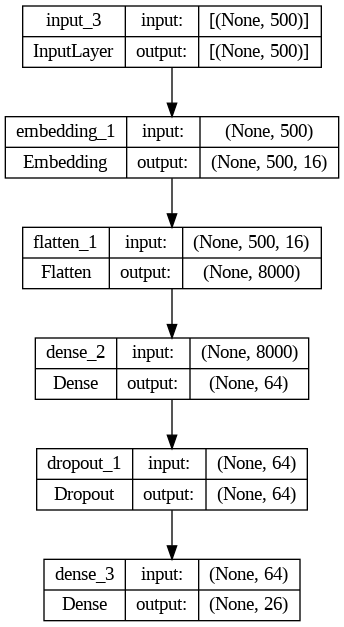

time: 227 ms (started: 2024-01-05 07:57:14 +00:00)


In [ ]:
tf.keras.utils.plot_model(model_FFN,show_shapes=True)

In [ ]:
history=model_FFN.fit(train_ds, validation_data=val_ds ,verbose=2, epochs=7)

Epoch 1/7
459/459 - 53s - loss: 2.8666 - sparse_categorical_accuracy: 0.1610 - val_loss: 1.9918 - val_sparse_categorical_accuracy: 0.4326 - 53s/epoch - 115ms/step
Epoch 2/7
459/459 - 14s - loss: 1.6620 - sparse_categorical_accuracy: 0.5151 - val_loss: 1.5193 - val_sparse_categorical_accuracy: 0.5815 - 14s/epoch - 32ms/step
Epoch 3/7
459/459 - 15s - loss: 1.0025 - sparse_categorical_accuracy: 0.7185 - val_loss: 1.4604 - val_sparse_categorical_accuracy: 0.6152 - 15s/epoch - 33ms/step
Epoch 4/7
459/459 - 16s - loss: 0.5807 - sparse_categorical_accuracy: 0.8400 - val_loss: 1.5643 - val_sparse_categorical_accuracy: 0.6201 - 16s/epoch - 35ms/step
Epoch 5/7
459/459 - 29s - loss: 0.3334 - sparse_categorical_accuracy: 0.9128 - val_loss: 1.7136 - val_sparse_categorical_accuracy: 0.6115 - 29s/epoch - 63ms/step
Epoch 6/7
459/459 - 15s - loss: 0.2045 - sparse_categorical_accuracy: 0.9483 - val_loss: 1.9020 - val_sparse_categorical_accuracy: 0.6081 - 15s/epoch - 33ms/step
Epoch 7/7
459/459 - 15s - l

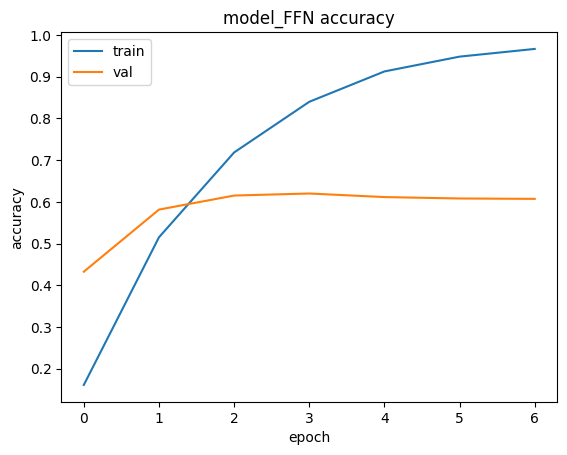

time: 353 ms (started: 2024-01-05 08:00:27 +00:00)


In [ ]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model_FFN accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
loss, accuracy = model_FFN.evaluate(test_ds)
print("Test accuracy: ", accuracy)

2554/2554 [==============================] - 230s 77ms/step - loss: 2.0545 - sparse_categorical_accuracy: 0.6126
Test accuracy:  0.6126235723495483
time: 4min 21s (started: 2024-01-05 08:00:31 +00:00)


In [ ]:
preds = model_FFN.predict(test_ds)
preds = preds.argmax(axis=1)

2554/2554 [==============================] - 14s 5ms/step
time: 15.3 s (started: 2024-01-05 08:04:53 +00:00)


In [ ]:
actuals = test_ds.unbatch().map(lambda x,y: y)
actuals=list(actuals.as_numpy_iterator())

time: 38.5 s (started: 2024-01-05 08:05:09 +00:00)


End to end model


ham veri ile çalışabilmek için yeni bir model oluştururuz

In [ ]:
end_to_end_model = tf.keras.Sequential([
  keras.Input(shape=(1,), dtype="string"),
  vectorize_layer,
  model_FFN,
  layers.Activation('softmax')
])

end_to_end_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer="adam", metrics=['accuracy']
)
end_to_end_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, 500)               0         
 ctorization)                                                    
                                                                 
 model_FFN (Functional)      (None, 26)                2113754   
                                                                 
 activation (Activation)     (None, 26)                0         
                                                                 
Total params: 2113754 (8.06 MB)
Trainable params: 2113754 (8.06 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
time: 247 ms (started: 2024-01-05 08:05:47 +00:00)


In [ ]:
loss, accuracy = end_to_end_model.evaluate(test_features, test_targets)
print("Test accuracy: ",accuracy)

5110/5110 [==============================] - 213s 42ms/step - loss: 2.0544 - accuracy: 0.6126
Test accuracy:  0.6126214861869812
time: 4min 23s (started: 2024-01-05 08:05:47 +00:00)


In [ ]:
raw_data=['ı really like to read book and my favorite is Othello.reading book Reading is a lifelong learning process, contributing to intellectual growth and personal development across various genres, including fiction, non-fiction, and poetry.',
          'The electoral process is a fundamental aspect of politics, allowing citizens to participate in choosing their representatives and leaders.',
          'Economic policies play a pivotal role in shaping the financial well-being of a nation, impacting factors such as employment, inflation, and overall economic growth.',
          'The gaming industry Comedy and humor play a crucial role in providing relief and joy, with comedians and entertainers often serving as cultural commentators and social critics.has experienced rapid growth, becoming a major source of entertainment for people of all ages around the world.Streaming platforms have revolutionized the way people consume entertainment, offering on-demand access to a vast array of content.']
predictions=end_to_end_model.predict(raw_data)
print(id_to_target[np.argmax(predictions[0])])
print(id_to_target[np.argmax(predictions[1])])
print(id_to_target[np.argmax(predictions[2])])
print(id_to_target[np.argmax(predictions[3])])

1/1 [==============================] - 0s 316ms/step
books and literature
healthy living
healthy living
books and literature
time: 389 ms (started: 2024-01-05 08:10:11 +00:00)


In [ ]:
tf.keras.models.save_model(end_to_end_model, 'model_FNN')

time: 2.75 s (started: 2024-01-05 08:10:11 +00:00)


In [ ]:
%ls

ls: cannot access 'drive': Transport endpoint is not connected
drive/  gdrive/  model_FNN/  model.png  sample_data/  vectorize_layer_model/
time: 113 ms (started: 2024-01-05 08:10:14 +00:00)


In [ ]:
from sklearn import metrics
print(metrics.classification_report(actuals, preds, digits=4))

              precision    recall  f1-score   support

           0     0.6983    0.6579    0.6775      6998
           1     0.5469    0.5537    0.5503      6587
           2     0.8666    0.8412    0.8537      6991
           3     0.7091    0.8189    0.7600      6997
           4     0.4515    0.5019    0.4754      7001
           5     0.9629    0.9677    0.9653      7553
           6     0.4642    0.5412    0.4997      7232
           7     0.5281    0.5562    0.5418      5854
           8     0.5861    0.4780    0.5265      4741
           9     0.4593    0.4173    0.4373      7731
          10     0.3915    0.5409    0.4542      5981
          11     0.4572    0.5007    0.4780      5750
          12     0.5549    0.5690    0.5619      5441
          13     0.6523    0.5040    0.5686      5155
          14     0.5366    0.6109    0.5714      7544
          15     0.5756    0.4277    0.4907      5280
          16     0.6163    0.5666    0.5904      6031
          17     0.9635    

In [ ]:
from sklearn.metrics import confusion_matrix
# Creating  a confusion matrix,
# which compares the y_test and y_pred
cm = confusion_matrix(actuals, preds)
cm_df = pd.DataFrame(cm, index = id_to_target.values() ,columns = id_to_target.values())

time: 139 ms (started: 2024-01-05 08:13:15 +00:00)


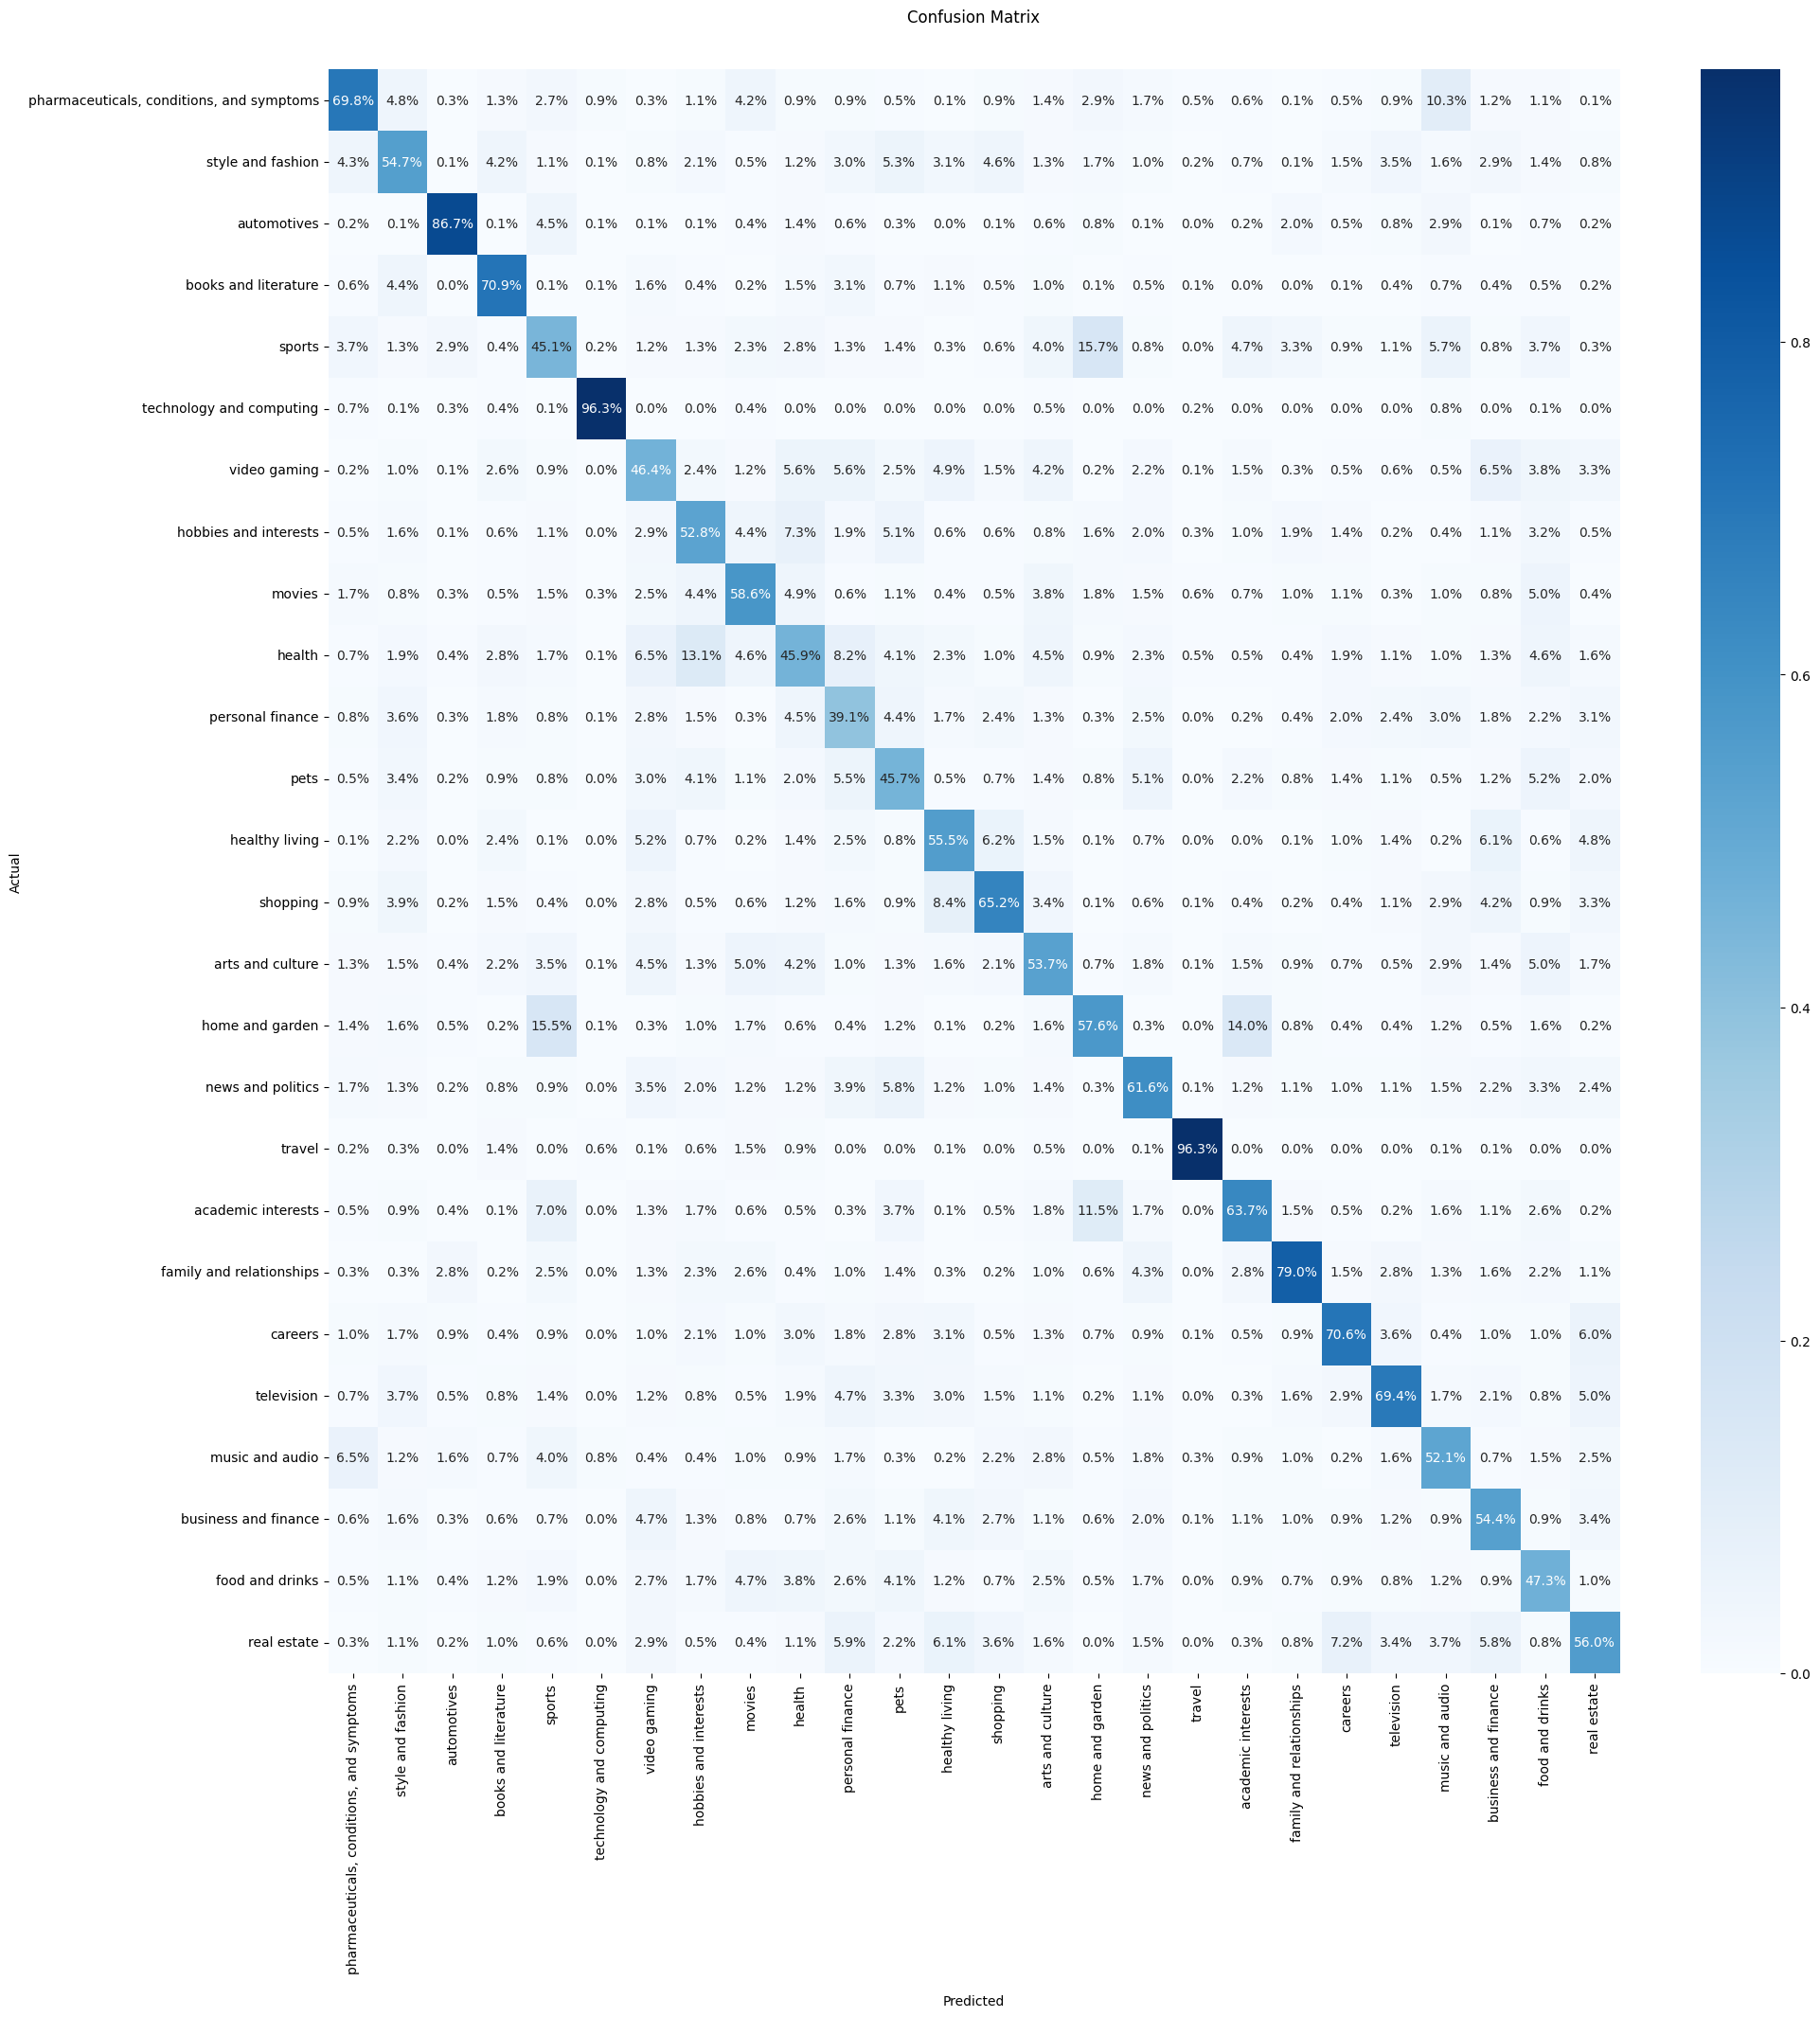

time: 5.93 s (started: 2024-01-05 08:13:50 +00:00)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(22,22))
ax = sns.heatmap(cm_df/np.sum(cm_df), annot=True, fmt='.1%', cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted')
ax.set_ylabel('Actual');

ax.xaxis.set_ticklabels(id_to_target.values())
ax.yaxis.set_ticklabels(id_to_target.values())

## Display the visualization of the Confusion Matrix.
plt.show()

# PART G: TEXT CLASSIFICATION WITH A RECURRENT LAYER

In [ ]:
embed_dim = 16  # Embedding size for each token
feed_forward_dim = 64  # Hidden layer size in feed forward network

def create_model_LSTM():
    inputs_tokens = layers.Input(shape=(max_len,), dtype=tf.int32)
    embedding_layer = layers.Embedding(input_dim=vocab_size,
                                       output_dim=embed_dim,
                                       input_length=max_len)
    x = embedding_layer(inputs_tokens)
    #x = layers.Conv1D(256, kernel_size=5)(x)
    #x = layers.GRU(256, return_sequences=True)(x)
    #x = layers.Bidirectional(layers.LSTM(256, return_sequences=True))(x)
    x = layers.LSTM(256, return_sequences=True)(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(feed_forward_dim, activation='relu')(x)
    x = layers.GlobalMaxPool1D()(x)
    outputs = layers.Dense(number_of_target)(x)
    model = keras.Model(inputs=inputs_tokens,
                        outputs=outputs, name='model_LSTM')
    loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    metric_fn  = tf.keras.metrics.SparseCategoricalAccuracy()
    model.compile(optimizer="adam", loss=loss_fn, metrics=metric_fn)

    return model
model_LSTM=create_model_LSTM()

In [ ]:
model_LSTM.summary()

In [ ]:
tf.keras.utils.plot_model(model_LSTM,show_shapes=True)

In [ ]:
train_ds.element_spec
val_ds.element_spec

In [ ]:
for X, y in val_ds.take(1):
  print(X.shape, y.shape)
  print("All categories values in this batch: ", y)
  print("\nFirst sample in the batch:")
  print("\tX is: " ,X[0])
  print("\ty is: ", y[0].numpy)
  input = " ".join([vocab[_] for _ in np.squeeze(X[0])])
  output = id_to_target[y[0].numpy()]
  print("\tinput (in text): " , input)
  print("\toutput (in category): " , output)

  print("\nSecond sample in the batch:")
  print("\tX is: " ,X[1])
  print("\ty is: ", y[1].numpy)
  input = " ".join([vocab[_] for _ in np.squeeze(X[1])])
  output = id_to_target[y[1].numpy()]
  print("\tinput (in text): " , input)
  print("\toutput (in category): " , output)

In [ ]:
history=model_LSTM.fit(train_ds, validation_data=val_ds ,verbose=1, epochs=25)

In [ ]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model_Conv1D accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_Conv1D loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Save the trained model

In [ ]:
tf.keras.models.save_model(model_LSTM, 'MultiClassTextClassification_BiLSTM')

In [ ]:
loss, accuracy = model_LSTM.evaluate(test_ds)
print("Test accuracy: ", accuracy)

In [ ]:
preds = model_LSTM.predict(test_ds)
preds = preds.argmax(axis=1)

In [ ]:
actuals = test_ds.unbatch().map(lambda x,y: y)
actuals=list(actuals.as_numpy_iterator())

In [ ]:
from sklearn import metrics
print(metrics.classification_report(actuals, preds, digits=4))

In [ ]:
from sklearn.metrics import confusion_matrix
# Creating  a confusion matrix,
# which compares the y_test and y_pred
cm = confusion_matrix(actuals, preds)
cm_df = pd.DataFrame(cm, index = id_to_category.values() ,
                     columns = id_to_category.values())

In [ ]:
firstN=8
cm_df.iloc[:firstN , :firstN]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))

ax = sns.heatmap(cm_df.iloc[:firstN ,
                            :firstN]/np.sum(cm_df.iloc[:firstN , :firstN]),
                 annot=True, fmt='.1%', cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted')
ax.set_ylabel('Actual');

ax.xaxis.set_ticklabels(list(id_to_category.values())[:firstN])
ax.yaxis.set_ticklabels(list(id_to_category.values())[:firstN])

## Display the visualization of the Confusion Matrix.
plt.show()

## Create an End-to-End model

In the code above, we applied the `TextVectorization` layer to the dataset before feeding text to the model. If you want to make your model capable of processing **raw strings** (for example, to simplify deploying it), you can include the `TextVectorization` layer inside your model. You can call this model as an End-to-End model.

To do so, you can create a new model using the  `TextVectorization` layer (`vectorize_layer`) we just trained as the first layer.

In [ ]:
end_to_end_model = tf.keras.Sequential([
  vectorize_layer,
  model_LSTM,
  layers.Activation('softmax')
])

end_to_end_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer="adam", metrics=['accuracy']
)

In [ ]:
loss, accuracy = end_to_end_model.evaluate(test_features, test_targets)
print("Test accuracy: ",accuracy)

In [ ]:
end_to_end_model.summary()

In [ ]:
xamples = [
  "Bir fenomen aracılığı ile Yalova Terma City otel'den arandık. Tatil kazandınız buyurun 16 ocakta gelin dediler. Gittik (2 küçük çocuk, eşim ve annem ), bizi y** adlı kişi karşıladı. Tanıtım yapacağız 4 saat dedi. Daha odamıza bile geçemeden, dinlemeye fırsat vermeden bize oteli gezdirmeye başladılar. Gürültülü, müzik sesli, havasız, kalabalık (Corona olduğu dönemde) bir salonda bize tapulu 1 haftalık arsa sattılar. (psikolojik baskı ile) Tabi o yorgunlukla (amaçları da bu zaten) dinlenmeden bize otelin her detayını anlattılar. Tapumuzu almadan para istediler, güvendik aldık. IBAN numarası otele ait olmayan şahsa 30 bin tl ödedik. 1 gün sonra tapu işlemleri yapılacaktı istemiyoruz tapu, tatil dedik. Kabul etmiyorlar, paramızı vermiyorlar. Ayrıca annemin kaldığı odada ısıtma sistemi çalışmıyordu, çocuk havuzu aşırı pisti, kadınlara ait termal havuz kapalı idi, odada telefon çalışmıyordu ya da bilerek sessize alıyorlar ilgilenmemek için.",
  "5 yıl kullandığım buzdolabım buzluktan şu akıtmaya başladı. Servis geldi içini boşaltın. Lastiklerinden hava alıyor sıcak suyla lastikleri yıkayın dediler. Denileni yaptım. 1 sene olmadan tekrar akıtmaya başladı",
  "Hepsiburada'dan esofman takimi aldık. 18 ocakta yola çıktı ve teslim edildi gözüküyor. Teslim adresi kayınpederimin dükkandı. Ben elemanlar aldı diye düşündüm. Fakat birkaç gün geçti getiren olmadı. Sorunca da kimsenin teslim almadığını öğrendim. Lütfen kargomuzu kime teslim ettiğinizi öğrenin, o gün dağıtım yapan kuryenize sorabilirsiniz. Gereğinin yapılacağını umuyorum, kızıma aldığım bir hediyeydi üzgünüm.",
  "Bimcell tarafıma mesaj atıp 6GB internet Hediye! Evet yazıp 3121'e göndererek kampanyaya katilin,3 gün içinde 30 TL'ye Dost Orta Paket almanız karşılığında haftalık 6GB cepten internet kazanın! Şeklinde mesaj attı dediklerini yerine getirdim paketi yaptım 3121 e Evet yazarak mesaj attım ancak 24.01.2022 de yaptığım işlem hala gerçekleşmedi hediye 6 GB hattıma tanımlanmadı",
  "Instagram'da gözlük marketi hesabı sattığı kalitesiz ürünü geri almıyor. Gözlük çok kötü. Saplar oyuncak desen değil. Oyuncakçıdan alsam çok daha kaliteli olurdu. Bir yazdım iade edebilirsiniz diyor. Sonra yok efendim iademiz yok diyor.",
  "Tamamlayıcı sağlık sigortamı iptal etmek istiyorum fakat ne bankadan ne NN SİGORTA'dan bir tek muhatap bile bulamıyorum. Telefonda dakikalarca tuşlama yapıp bekletiliyor kimsenin cevap verdiği yok. Zaman kaybından başka bir şey değil! İletişim kurabileceğim biri tarafından aranmak istiyorum",
  "Selamlar TOKİ ve emlak yönetimden şikayetimiz var. Kastamonu merkez örencik TOKİ 316 konut 3 gündür kömür gelmedi bir çok blokta kömür bitmiş durumda bu kış zamanında eksi 8 ila 15 derecede yaşlılar hastalar çocuklar bütün herkesi mağdur ettiler. Emlak yönetim 734.60 ton kömür anlaşması yapmış onu da geç yaptığı için zaten yüksek maliyet çıkarmıştı yeni fiyat güncellemesi yapacakmış örneğin bana 6.160 TL nin üzerine fiyat eklenecekmiş bu işi yapan sorumlu kişi veya kişilerin zamanında tedbir almamasının cezasını TOKİ de oturan insanlar çekiyor ya sistem ya da kişiler hatalı"
]

predictions=end_to_end_model.predict(examples)
for pred in predictions:
  print(id_to_category[np.argmax(pred)])